<a href="https://colab.research.google.com/github/exowanderer/medium_tutorials/blob/Bayesian/BayesianInference/MCMCFromScratch/MCMC_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metropolis-Hastings MCMC from Scratch  
[Colab Environment](https://colab.research.google.com/drive/1qLkKh1FAGk4B-KAlL6HCqzwohnBQnLHg?usp=sharing)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
def metropolis_hastings_simple(
        likelihood, proposal_distribution,
        initial_state, num_samples, stepsize=0.5, burnin=0.2):
    """_summary_

    Args:
        likelihood (function): _description_
        proposal_distribution (function): _description_
        initial_state (list): _description_
        num_samples (integer): _description_
        burnin (float): a float value from 0 to 1. The percentage of chain considered to be the burnin length

    Returns:
        samples (list): The Markov Chain -- samples from the posterior distribution
    """
    samples = []

    # The number of samples in the burn in phase
    idx_burnin = int(burnin * num_samples)

    # Set the current state to the initial state
    current_state = initial_state

    for i in range(num_samples):
        # Generate a proposal state using the proposal distribution
        # Proposal state == new guess state to be compared to current
        proposal_state = proposal_distribution(current_state)

        # Calculate the acceptance probability
        prop_prob = likelihood(proposal_state)
        curr_prob = likelihood(current_state)
        acceptance_prob = prop_prob / curr_prob

        # Generate a random number between 0 and 1
        u = np.random.uniform(0, 1)

        # If the acceptance probability is greater than the random number,
        # accept the proposal state as the current state
        if acceptance_prob > u:
            current_state = proposal_state

        # Append the current state to the list of samples
        if i >= idx_burnin:
            # Only append after the burnin to avoid including
            #   parts of the chain that are prior dominated
            samples.append(current_state)

    return samples

def likelihood(x):
    # Standard Normal Distribution
    # An underlying assumption of linear regression is that the residuals
    # are Gaussian Normal Distributed; often, Standard Normal distributed
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def proposal_distribution(x, stepsize=0.5):
    # Select the proposed state (new guess) from a Gaussian distriution
    # centered at the current state, within a Guassian of width `stepsize`
    return np.random.normal(x, stepsize)

def plot_chain(samples, burnin=0.2, super_burnin=0.01, nsig=3, fmt='-', ax=None):
    num_samples = len(samples)
    
    idx_burnin = int(num_samples*burnin)
    idx_super_burnin = int(num_samples*super_burnin) + 1

    sample_steps = np.arange(num_samples)
    
    window = int(0.2*num_samples)
    df = pd.DataFrame(samples, columns=['samples'])
    # df['median'] = df['samples'].rolling(window=window, center=True, min_periods=0).median()
    # df['stddev'] = df['samples'].rolling(window=window, center=True, min_periods=0).std()
    df['low_q'] = df['samples'].rolling(window=window, center=True, min_periods=0).quantile(quantile=0.05)
    df['high_q'] = df['samples'].rolling(window=window, center=True, min_periods=0).quantile(quantile=0.95)
    
    estimate = np.mean(samples)
    stddev = np.std(samples)
    title = f'The estimate over the chain is: {estimate:0.2f} ± {stddev:0.2f}'

    ax_is_None = ax is None
    if ax_is_None:
        fig, ax = plt.subplots(figsize=(20,10))

    ax.plot(sample_steps[idx_burnin:], samples[idx_burnin:], fmt, ms=1)
    ax.plot(sample_steps[idx_super_burnin:idx_burnin], samples[idx_super_burnin:idx_burnin], fmt, ms=1)
    ax.plot(sample_steps[:idx_super_burnin], samples[:idx_super_burnin], fmt, ms=1)
    ax.fill_between(sample_steps, df['low_q'], df['high_q'], color='pink')

    ax.set_title(title)

    if ax_is_None:
        plt.show()
    
    return ax

def plot_chain_ensemble(chains, burnin=0.2, alpha=0.25, figsize=(20,10), ax=None):
    n_chains = len(chains)
    n_samples = np.min([len(chain_) for chain_ in chains])

    chains = [chain_[:n_samples] for chain_ in chains]
    sample_steps = np.arange(n_samples)

    # window = int(burnin*n_samples)

    column_names = [f'chain{nc_}' for nc_ in range(n_chains)]
    df = pd.DataFrame(np.transpose(chains), columns=column_names)

    df.plot(alpha=alpha, figsize=figsize)
    plt.legend(loc="lower left", ncol=len(df.columns)//3, bbox_to_anchor=(0,0))

Test the MCMC starting from **far** away from the solution  
initiate state: `x = 40

<ipython-input-2-68eaa191341a>:32: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_prob = prop_prob / curr_prob
<ipython-input-2-68eaa191341a>:32: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_prob = prop_prob / curr_prob


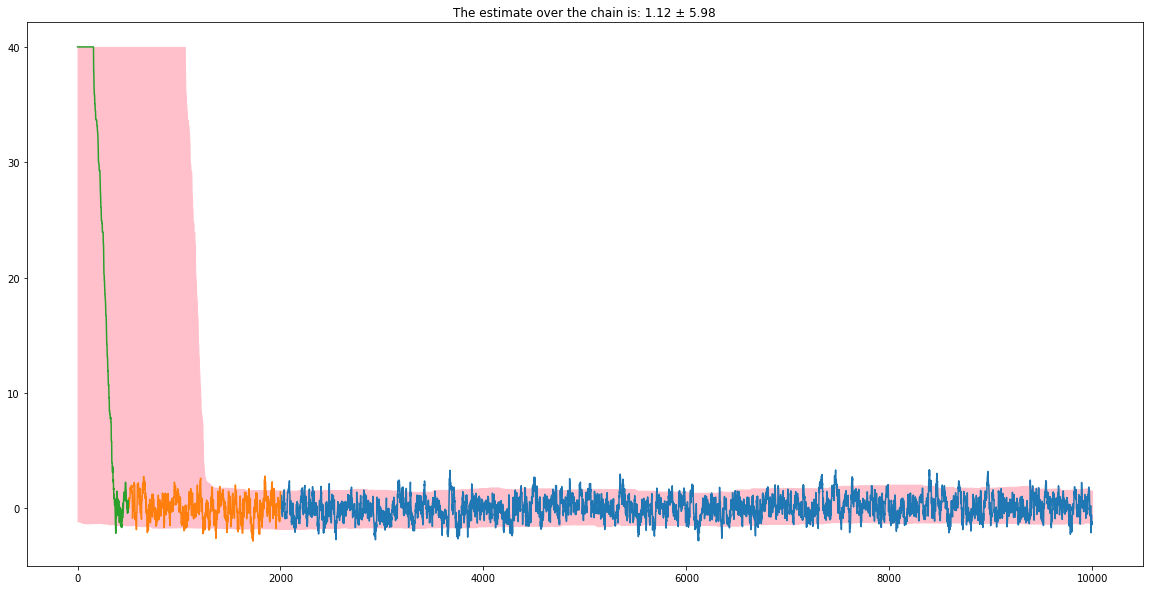

In [3]:
np.random.seed(42)

burnin = 0.2
initial_state = 40
num_samples = int(1e4)

samples = metropolis_hastings_simple(
    likelihood,
    proposal_distribution,
    initial_state,
    num_samples,
    burnin=0.0
)

plot_chain(samples, burnin=burnin, super_burnin=burnin/4)

Test the MCMC starting nearby the solution  
initiate state: `x = 5`

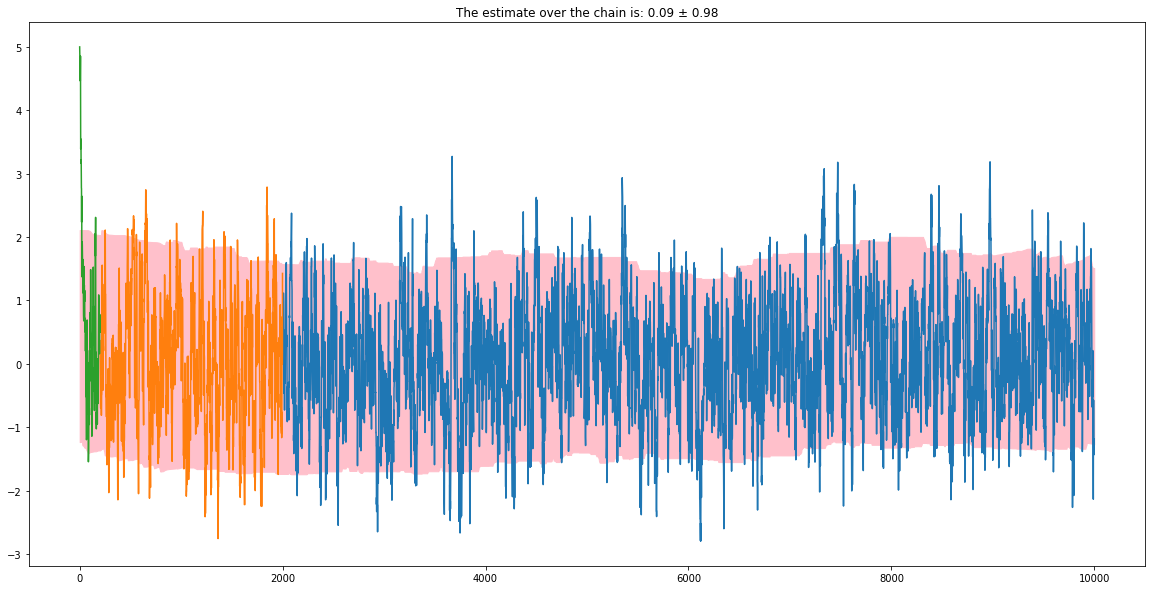

In [4]:
np.random.seed(42)

burnin = 0.2
initial_state = 5
num_samples = int(1e4)

samples = metropolis_hastings_simple(
    likelihood,
    proposal_distribution,
    initial_state,
    num_samples,
    burnin=0.0
)

plot_chain(samples, burnin=burnin, super_burnin=burnin/10)

Test the MCMC starting at the solution  
initiate state: `x = 0`

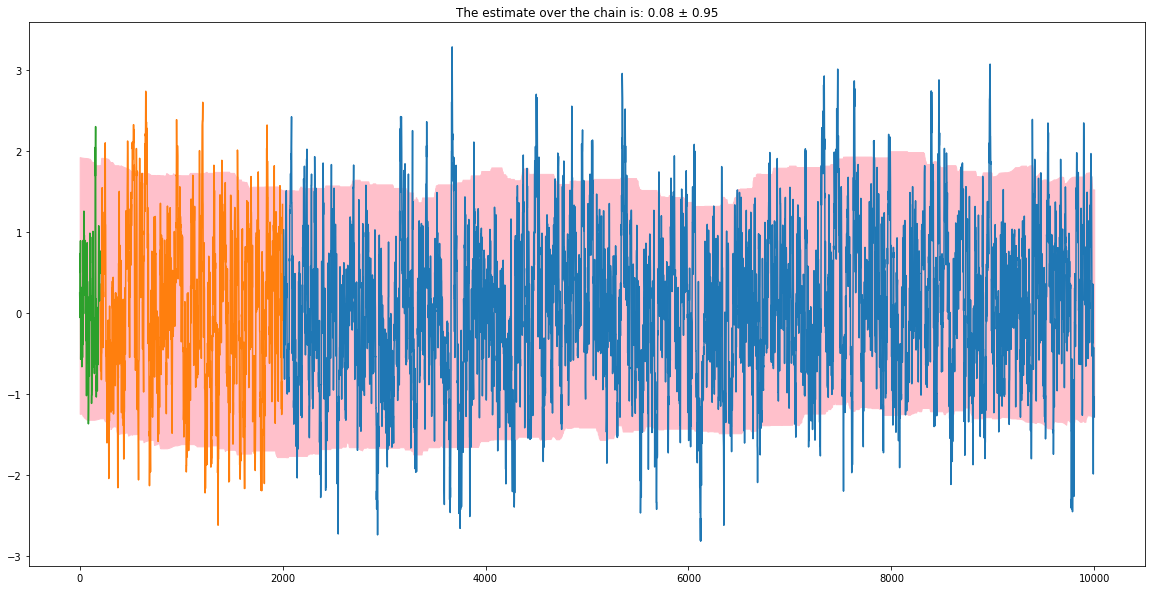

In [5]:
np.random.seed(42)

burnin = 0.2
initial_state = 0
num_samples = int(1e4)

samples = metropolis_hastings_simple(
    likelihood,
    proposal_distribution,
    initial_state,
    num_samples,
    burnin=0.0
)

plot_chain(samples, burnin=burnin, super_burnin=burnin/10)

Run the MCMC, starting at the solution, for 10x longer  
initiate state: `x = 0`  
num samples: `n_samples = 1e5`

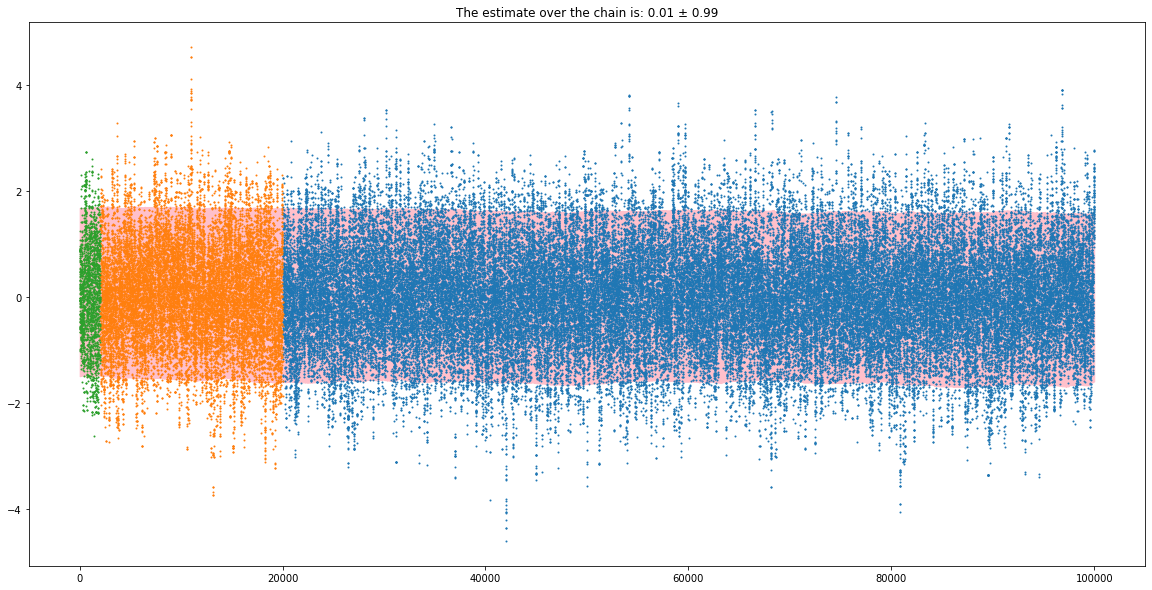

In [6]:
np.random.seed(42)

burnin = 0.2
initial_state = 0
num_samples = int(1e5)

samples = metropolis_hastings_simple(
    likelihood,
    proposal_distribution,
    initial_state,
    num_samples,
    burnin=0.0
)

plot_chain(samples, burnin=burnin, super_burnin=burnin/10, fmt='o')

# Ensemble MCMC - Simple

In [21]:
np.random.seed(0)

burnin = 0.2
num_samples = int(1e3)
n_chains = 10

chains = [
    metropolis_hastings_simple(
        likelihood=likelihood,
        proposal_distribution=proposal_distribution,
        initial_state=np.random.normal(0,20),
        num_samples=num_samples,
        burnin=0.0
    )
    for _ in range(n_chains)
]

<ipython-input-2-68eaa191341a>:32: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_prob = prop_prob / curr_prob
<ipython-input-2-68eaa191341a>:32: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_prob = prop_prob / curr_prob


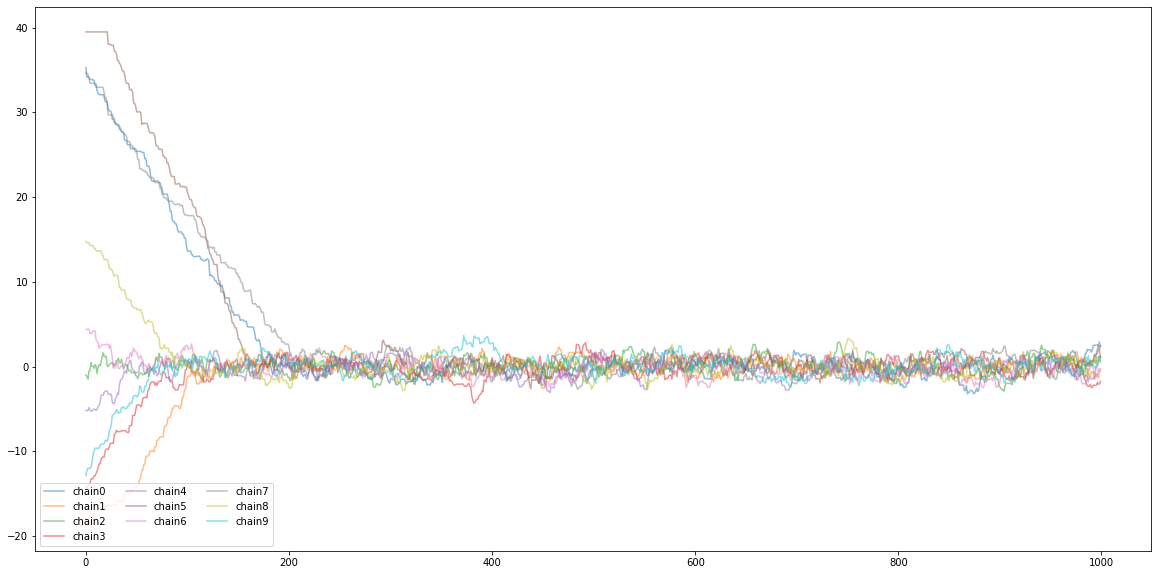

In [22]:
plot_chain_ensemble(chains, burnin=0.2, alpha=0.5, figsize=(20,10), ax=None)